handling imbalanced data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Training data file.csv', index_col='Customer_No')

In [3]:
df.head()

,N_Default_L3m,Branch_Code,Max_Utilization,Max_Perc_Def_Chg_Pending,N_Family_Member,Max_Ratio_OC_Pending_POS,N_PosBkt_L3m,CoAp_Income,Ever_Default_L12M,Perc_Paymode_Online,...,Birth_Year,Max_DPD_L3m,Perc_Paymode_Cheq_Fail,Age,Total_Field_Trails,Total_Resolved,N_Enq_L9m,Max_Loan_Balance_Others,N_WorkEx_Yr,Target_Flag
Customer_No,,,,,,,,,,,,,,,,,,,,,
1,3,61749,38,100.0,5,NaN,0.0,NaN,Yes,0.285714,...,1977,19.0,0.750,46,NaN,NaN,0,5527.0,15,0
2,1,30831,68,100.0,1,NaN,0.0,NaN,Yes,0.000000,...,1990,2.0,0.500,33,NaN,NaN,0,12104.0,2,0
3,1,56708,39,50.0,-3,NaN,0.0,NaN,Yes,0.200000,...,1995,25.0,1.000,28,NaN,0.0,1,153179.0,8,0
4,0,43551,76,NaN,0,NaN,0.0,NaN,No,0.000000,...,1997,0.0,NaN,26,NaN,NaN,2,181589.0,6,0
5,3,15287,23,33.0,11,NaN,0.0,NaN,Yes,0.250000,...,1995,19.0,0.375,28,NaN,NaN,1,10661.0,8,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81253 entries, 1 to 81253
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   N_Default_L3m             81253 non-null  int64  
 1   Branch_Code               81253 non-null  int64  
 2   Max_Utilization           81253 non-null  int64  
 3   Max_Perc_Def_Chg_Pending  60175 non-null  float64
 4   N_Family_Member           81253 non-null  int64  
 5   Max_Ratio_OC_Pending_POS  8607 non-null   float64
 6   N_PosBkt_L3m              75915 non-null  float64
 7   CoAp_Income               4118 non-null   float64
 8   Ever_Default_L12M         81253 non-null  object 
 9   Perc_Paymode_Online       81253 non-null  float64
 10  Perc_Repay_Fail           81253 non-null  float64
 11  Birth_Year                81253 non-null  int64  
 12  Max_DPD_L3m               81010 non-null  float64
 13  Perc_Paymode_Cheq_Fail    57776 non-null  float64
 14  Age   

In [5]:
col = df.columns

In [6]:
col

Index(['N_Default_L3m', 'Branch_Code', 'Max_Utilization',
       'Max_Perc_Def_Chg_Pending', 'N_Family_Member',
       'Max_Ratio_OC_Pending_POS', 'N_PosBkt_L3m', 'CoAp_Income',
       'Ever_Default_L12M', 'Perc_Paymode_Online', 'Perc_Repay_Fail',
       'Birth_Year', 'Max_DPD_L3m', 'Perc_Paymode_Cheq_Fail', 'Age',
       'Total_Field_Trails', 'Total_Resolved', 'N_Enq_L9m',
       'Max_Loan_Balance_Others', 'N_WorkEx_Yr', 'Target_Flag'],
      dtype='object')

In [7]:
df.drop(columns=['Branch_Code','Birth_Year'], inplace= True)

In [8]:
df.head()

,N_Default_L3m,Max_Utilization,Max_Perc_Def_Chg_Pending,N_Family_Member,Max_Ratio_OC_Pending_POS,N_PosBkt_L3m,CoAp_Income,Ever_Default_L12M,Perc_Paymode_Online,Perc_Repay_Fail,Max_DPD_L3m,Perc_Paymode_Cheq_Fail,Age,Total_Field_Trails,Total_Resolved,N_Enq_L9m,Max_Loan_Balance_Others,N_WorkEx_Yr,Target_Flag
Customer_No,,,,,,,,,,,,,,,,,,,
1,3,38,100.0,5,NaN,0.0,NaN,Yes,0.285714,0.428571,19.0,0.750,46,NaN,NaN,0,5527.0,15,0
2,1,68,100.0,1,NaN,0.0,NaN,Yes,0.000000,0.200000,2.0,0.500,33,NaN,NaN,0,12104.0,2,0
3,1,39,50.0,-3,NaN,0.0,NaN,Yes,0.200000,0.200000,25.0,1.000,28,NaN,0.0,1,153179.0,8,0
4,0,76,NaN,0,NaN,0.0,NaN,No,0.000000,0.000000,0.0,NaN,26,NaN,NaN,2,181589.0,6,0
5,3,23,33.0,11,NaN,0.0,NaN,Yes,0.250000,0.250000,19.0,0.375,28,NaN,NaN,1,10661.0,8,0


In [9]:
df.shape

(81253, 19)

In [10]:
df.describe()

,N_Default_L3m,Max_Utilization,Max_Perc_Def_Chg_Pending,N_Family_Member,Max_Ratio_OC_Pending_POS,N_PosBkt_L3m,CoAp_Income,Perc_Paymode_Online,Perc_Repay_Fail,Max_DPD_L3m,Perc_Paymode_Cheq_Fail,Age,Total_Field_Trails,Total_Resolved,N_Enq_L9m,Max_Loan_Balance_Others,N_WorkEx_Yr,Target_Flag
count,81253.000000,81253.000000,60175.000000,81253.000000,8607.000000,75915.000000,4118.000000,81253.000000,81253.000000,81010.000000,57776.000000,81253.000000,26541.000000,30948.000000,81253.000000,8.091200e+04,81253.000000,81253.000000
mean,1.463244,72.799897,85.887877,2.997403,0.127985,0.013225,66705.865712,0.142982,0.216263,10.485681,0.589924,33.350178,0.431672,1.420512,0.851082,1.462583e+05,8.306487,0.120414
std,1.192534,20.463910,30.382934,4.908966,0.167004,0.122583,10062.391979,0.162986,0.159889,9.751303,0.200213,8.946473,0.739288,0.896337,1.773618,4.509210e+05,8.583735,0.325447
min,0.000000,17.000000,0.000000,-5.000000,0.000000,0.000000,10000.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,-5.425000e+03,-7.000000,0.000000
25%,0.000000,52.000000,99.000000,-1.000000,0.045886,0.000000,67661.000000,0.000000,0.000000,0.000000,0.500000,26.000000,0.000000,1.000000,0.000000,9.992000e+03,3.000000,0.000000
50%,1.000000,76.000000,100.000000,3.000000,0.080090,0.000000,68425.000000,0.000000,0.250000,9.000000,0.500000,31.000000,0.000000,1.000000,0.000000,1.999900e+04,7.000000,0.000000
75%,3.000000,88.000000,100.000000,7.000000,0.148235,0.000000,69214.000000,0.285714,0.333333,18.000000,0.666667,39.000000,1.000000,2.000000,1.000000,1.100060e+05,13.000000,0.000000
max,3.000000,100.000000,100.000000,11.000000,4.976905,3.000000,70000.000000,0.750000,0.750000,29.000000,1.000000,67.000000,9.000000,3.000000,33.000000,6.553632e+07,43.000000,1.000000


In [11]:
df.isna().sum()

N_Default_L3m                   0
Max_Utilization                 0
Max_Perc_Def_Chg_Pending    21078
N_Family_Member                 0
Max_Ratio_OC_Pending_POS    72646
N_PosBkt_L3m                 5338
CoAp_Income                 77135
Ever_Default_L12M               0
Perc_Paymode_Online             0
Perc_Repay_Fail                 0
Max_DPD_L3m                   243
Perc_Paymode_Cheq_Fail      23477
Age                             0
Total_Field_Trails          54712
Total_Resolved              50305
N_Enq_L9m                       0
Max_Loan_Balance_Others       341
N_WorkEx_Yr                     0
Target_Flag                     0
dtype: int64

In [12]:
def unique_values(column):
    return df[column].unique(), df[column].nunique()

In [13]:
print(unique_values('Max_Ratio_OC_Pending_POS'),unique_values('Max_Perc_Def_Chg_Pending'))

(array([       nan, 0.21488732, 0.67344765, ..., 0.05287244, 0.02128042,
       0.04370457]), 6182) (array([100.,  50.,  nan,  33.,   0.,  83.,  97.,  75.,  67.,  82.,  98.,
        25.,  95.,  80.,  35.,  89.,  99.,  79.,  86.,  94.,  88.,   6.,
        91.,  57.,  45.,  60.,  40.,  66.,  96.,  78.,  64.,  92.,  81.,
        71.,  73.,  93.,  74.,  47.,  84.,  87.,  38.,  31.,  43.,  20.,
        85.,  56.,  13.,  70.,  42.,  17.,  62.,  58.,  26.,  76.,  90.,
        61.,  27.,  72.,  37.,  77.,  48.,  49.,  29.,  65.,  68.,   3.,
        69.,  59.,  51.,  34.,  14.,  63.,  41.,   2.,  52.,  46.,  12.,
         7.,  18.,   8.,   5.,   9.,  15.,  19.,  24.,  32.,   4.,  53.,
        55.,  44.,  39.,  22.,  36.,  54.,  11.,  30.,  21.,   1.,  10.,
        28.,  23.,  16.]), 101)


In [14]:
df['Max_Ratio_OC_Pending_POS'].fillna(value=0, inplace=True)
df['Max_Perc_Def_Chg_Pending'].fillna(value=0, inplace=True)

In [15]:
unique_values('N_PosBkt_L3m')

(array([ 0.,  1., nan,  2.,  3.]), 4)

In [16]:
df.drop(columns = 'CoAp_Income', inplace = True)

In [17]:
df['Perc_Paymode_Cheq_Fail'].fillna(value=0, inplace=True)

In [18]:
df['Total_Field_Trails'].fillna(value=0, inplace=True)
df['Total_Resolved'].fillna(value=0, inplace=True)
df['N_PosBkt_L3m'].fillna(value=0, inplace=True)
df['Max_DPD_L3m'].fillna(value=0, inplace=True)
df['Max_Loan_Balance_Others'].fillna(value=0, inplace=True)


In [19]:
df.isna().sum()

N_Default_L3m               0
Max_Utilization             0
Max_Perc_Def_Chg_Pending    0
N_Family_Member             0
Max_Ratio_OC_Pending_POS    0
N_PosBkt_L3m                0
Ever_Default_L12M           0
Perc_Paymode_Online         0
Perc_Repay_Fail             0
Max_DPD_L3m                 0
Perc_Paymode_Cheq_Fail      0
Age                         0
Total_Field_Trails          0
Total_Resolved              0
N_Enq_L9m                   0
Max_Loan_Balance_Others     0
N_WorkEx_Yr                 0
Target_Flag                 0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81253 entries, 1 to 81253
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   N_Default_L3m             81253 non-null  int64  
 1   Max_Utilization           81253 non-null  int64  
 2   Max_Perc_Def_Chg_Pending  81253 non-null  float64
 3   N_Family_Member           81253 non-null  int64  
 4   Max_Ratio_OC_Pending_POS  81253 non-null  float64
 5   N_PosBkt_L3m              81253 non-null  float64
 6   Ever_Default_L12M         81253 non-null  object 
 7   Perc_Paymode_Online       81253 non-null  float64
 8   Perc_Repay_Fail           81253 non-null  float64
 9   Max_DPD_L3m               81253 non-null  float64
 10  Perc_Paymode_Cheq_Fail    81253 non-null  float64
 11  Age                       81253 non-null  int64  
 12  Total_Field_Trails        81253 non-null  float64
 13  Total_Resolved            81253 non-null  float64
 14  N_Enq_

In [21]:
df['Ever_Default_L12M'] = df['Ever_Default_L12M'].replace({'Yes': 1, 'No': 0})

In [22]:
df1 = df.copy()

In [23]:
y_train = df['Target_Flag']
df = df.drop('Target_Flag',axis=1)

In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings(action = 'ignore')

In [25]:
scaler = MinMaxScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), index = df.index, columns = df.columns)

In [26]:
skf = StratifiedKFold(n_splits = 20)

results = []

for train_c, test_c in skf.split(df, y_train):
    model = LogisticRegression()
    model.fit(df.iloc[train_c,:], y_train.iloc[train_c])
    result = model.score(df.iloc[test_c, :], y_train.iloc[test_c])
    results.append(result)

In [27]:
for i, result in enumerate(results):
    print('Fold{}: {:.2f}%'.format(i+1, result*100))

Fold1: 87.96%
Fold2: 87.96%
Fold3: 87.89%
Fold4: 87.94%
Fold5: 87.89%
Fold6: 87.94%
Fold7: 87.74%
Fold8: 87.89%
Fold9: 87.74%
Fold10: 87.99%
Fold11: 87.79%
Fold12: 87.79%
Fold13: 87.96%
Fold14: 87.94%
Fold15: 87.96%
Fold16: 87.96%
Fold17: 87.99%
Fold18: 87.96%
Fold19: 87.94%
Fold20: 87.96%


In [28]:
y_train.value_counts()

0    71469
1     9784
Name: Target_Flag, dtype: int64

In [29]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df, y_train, train_size=0.7, random_state=123)

In [31]:
model = LogisticRegression(
    class_weight={
        0: 1,
        1: 8
    }
)

model.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1, 1: 8})

In [32]:
y_pred = model.predict(X_test)

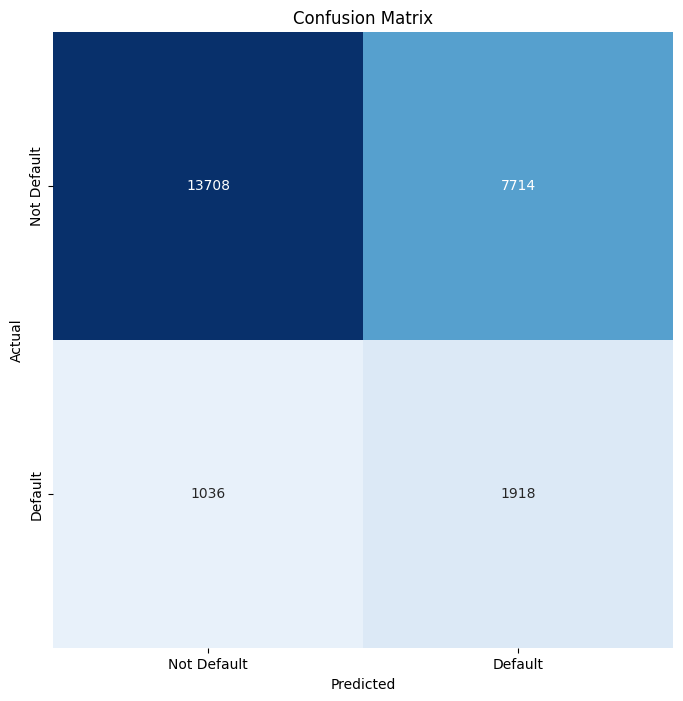

In [33]:
clr = classification_report(y_test, y_pred, target_names=["Not Default", "Default"])
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(np.arange(2) + 0.5, ["Not Default", "Default"])
plt.yticks(np.arange(2) + 0.5, ["Not Default", "Default"])
plt.title("Confusion Matrix")
plt.show()

In [34]:
print("Classification Report:\n----------------------\n", clr)

Classification Report:
----------------------
               precision    recall  f1-score   support

 Not Default       0.93      0.64      0.76     21422
     Default       0.20      0.65      0.30      2954

    accuracy                           0.64     24376
   macro avg       0.56      0.64      0.53     24376
weighted avg       0.84      0.64      0.70     24376



In [36]:
df1.head()

,N_Default_L3m,Max_Utilization,Max_Perc_Def_Chg_Pending,N_Family_Member,Max_Ratio_OC_Pending_POS,N_PosBkt_L3m,Ever_Default_L12M,Perc_Paymode_Online,Perc_Repay_Fail,Max_DPD_L3m,Perc_Paymode_Cheq_Fail,Age,Total_Field_Trails,Total_Resolved,N_Enq_L9m,Max_Loan_Balance_Others,N_WorkEx_Yr,Target_Flag
Customer_No,,,,,,,,,,,,,,,,,,
1,3,38,100.0,5,0.0,0.0,1,0.285714,0.428571,19.0,0.750,46,0.0,0.0,0,5527.0,15,0
2,1,68,100.0,1,0.0,0.0,1,0.000000,0.200000,2.0,0.500,33,0.0,0.0,0,12104.0,2,0
3,1,39,50.0,-3,0.0,0.0,1,0.200000,0.200000,25.0,1.000,28,0.0,0.0,1,153179.0,8,0
4,0,76,0.0,0,0.0,0.0,0,0.000000,0.000000,0.0,0.000,26,0.0,0.0,2,181589.0,6,0
5,3,23,33.0,11,0.0,0.0,1,0.250000,0.250000,19.0,0.375,28,0.0,0.0,1,10661.0,8,0


In [44]:
def split_and_scale(df):
    df = df.copy()
    
    # Split df into X and y
    y = df['Target_Flag'].copy()
    X = df.drop('Target_Flag', axis=1).copy()
    
    # Train-test-split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [39]:
def evaluate_model(model, class_balance, X_test, y_test):
    
    model_acc = model.score(X_test, y_test)
    print("Accuracy ({}): {:.2f}%".format(class_balance, model_acc * 100))
    
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    clr = classification_report(y_test, y_pred)
    
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=False, cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n----------------------\n", clr)

In [37]:
max_class_size = np.max(df1['Target_Flag'].value_counts().values)

print("Size of largest class:", max_class_size)

Size of largest class: 71469


In [40]:
# Oversampling the minority classes
class_subsets = [df1.query("Target_Flag == " + str(i)) for i in range(2)]

for i in range(2):
    class_subsets[i] = class_subsets[i].sample(max_class_size, replace=True, random_state=123)

oversampled_data = pd.concat(class_subsets, axis=0).sample(frac=1.0, random_state=123).reset_index(drop=True)

In [41]:
oversampled_data

,N_Default_L3m,Max_Utilization,Max_Perc_Def_Chg_Pending,N_Family_Member,Max_Ratio_OC_Pending_POS,N_PosBkt_L3m,Ever_Default_L12M,Perc_Paymode_Online,Perc_Repay_Fail,Max_DPD_L3m,Perc_Paymode_Cheq_Fail,Age,Total_Field_Trails,Total_Resolved,N_Enq_L9m,Max_Loan_Balance_Others,N_WorkEx_Yr,Target_Flag
0,1,100,100.0,-1,0.0,0.0,1,0.250000,0.250000,16.0,0.500000,34,0.0,0.0,2,0.0,13,1
1,0,45,0.0,10,0.0,0.0,0,0.000000,0.000000,0.0,0.000000,31,0.0,0.0,0,140803.0,11,1
2,1,44,100.0,-5,0.0,0.0,1,0.250000,0.250000,18.0,1.000000,36,1.0,1.0,0,8444.0,11,0
3,3,35,99.0,11,0.0,0.0,1,0.333333,0.333333,25.0,0.500000,33,2.0,2.0,0,520000.0,13,1
4,1,100,0.0,10,0.0,0.0,1,0.000000,0.200000,28.0,0.333333,28,0.0,1.0,0,10973.0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142933,2,100,100.0,10,0.0,0.0,1,0.333333,0.333333,16.0,0.500000,22,0.0,0.0,4,77872.0,2,1
142934,2,84,100.0,8,0.0,0.0,1,0.000000,0.285714,2.0,0.500000,36,0.0,0.0,0,11640.0,0,1
142935,3,51,100.0,5,0.0,0.0,1,0.500000,0.500000,6.0,1.000000,31,0.0,2.0,0,8316.0,11,0
142936,0,76,0.0,-4,0.0,0.0,0,0.000000,0.000000,0.0,0.000000,29,0.0,0.0,0,93288.0,9,0


In [42]:
oversampled_data['Target_Flag'].value_counts()

1    71469
0    71469
Name: Target_Flag, dtype: int64

In [45]:
X_train, X_test, y_train, y_test = split_and_scale(oversampled_data)

In [54]:
model3 = LogisticRegression(
    class_weight={
        0: 1,
        1: 1
    }
)
model3.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1, 1: 1})

Accuracy (Oversampling): 64.43%


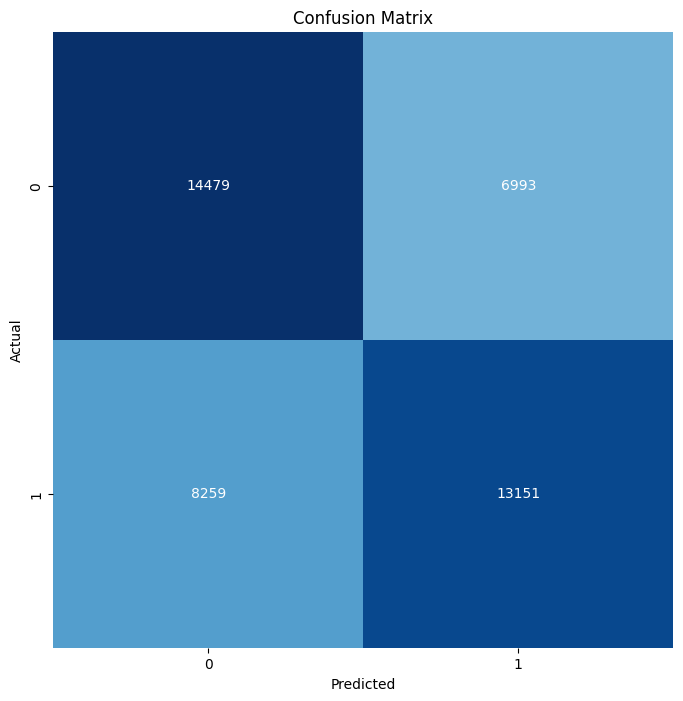

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.64      0.67      0.66     21472
           1       0.65      0.61      0.63     21410

    accuracy                           0.64     42882
   macro avg       0.64      0.64      0.64     42882
weighted avg       0.64      0.64      0.64     42882



In [55]:
evaluate_model(model3, "Oversampling", X_test, y_test)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.64      0.67      0.66     21472
           1       0.65      0.61      0.63     21410

    accuracy                           0.64     42882
   macro avg       0.64      0.64      0.64     42882
weighted avg       0.64      0.64      0.64     42882





Classification Report:
----------------------
               precision    recall  f1-score   support

 Not Default       0.93      0.64      0.76     21422
     Default       0.20      0.65      0.30      2954

    accuracy                           0.64     24376
   macro avg       0.56      0.64      0.53     24376
weighted avg       0.84      0.64      0.70     24376